In [4]:
!pip install numpy


     |████████████████████████████████| 15.7 MB 8.9 MB/s            


In [5]:
!pip install pandas && matplotlib


     |████████████████████████████████| 11.5 MB 6.6 MB/s            
     |████████████████████████████████| 503 kB 10.4 MB/s            
/bin/bash: matplotlib: command not found


In [7]:
!pip install matplotlib

     |████████████████████████████████| 11.3 MB 3.8 MB/s            
     |████████████████████████████████| 890 kB 5.9 MB/s            
     |████████████████████████████████| 1.2 MB 7.5 MB/s            
     |████████████████████████████████| 3.1 MB 5.8 MB/s            


In [8]:
!pip install pandas_datareader 

     |████████████████████████████████| 109 kB 3.2 MB/s            
     |████████████████████████████████| 6.9 MB 1.1 MB/s            
     |████████████████████████████████| 62 kB 1.3 MB/s            
     |████████████████████████████████| 61 kB 4.2 MB/s            
     |████████████████████████████████| 138 kB 7.8 MB/s            
     |████████████████████████████████| 149 kB 11.0 MB/s            


In [9]:
import numpy as np

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [11]:
start = '2010-01-01'
end = '2019-12-31'

df = data.DataReader('AAPL','yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [12]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.027306
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.416672
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.389572
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.813271
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.337997


In [13]:
df = df.reset_index()
df.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [14]:
df = df.drop(['Date', 'Adj Close'], axis = 1)


In [15]:
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


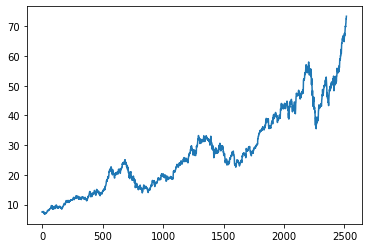

In [16]:
plt.plot(df.Close)

In [17]:
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [18]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

In [19]:
ma100[101]

8.105221433639526

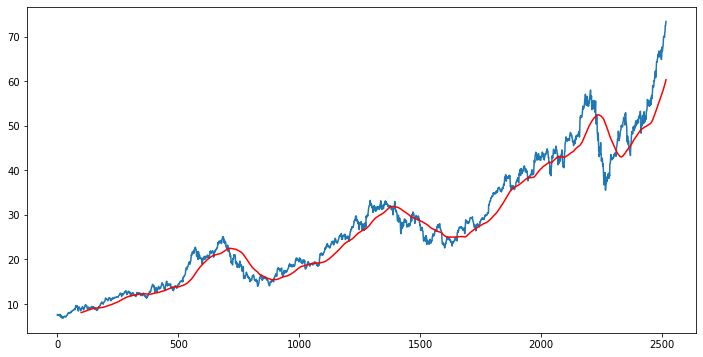

In [21]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')


In [22]:
#we can also use exponential moving averages...
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

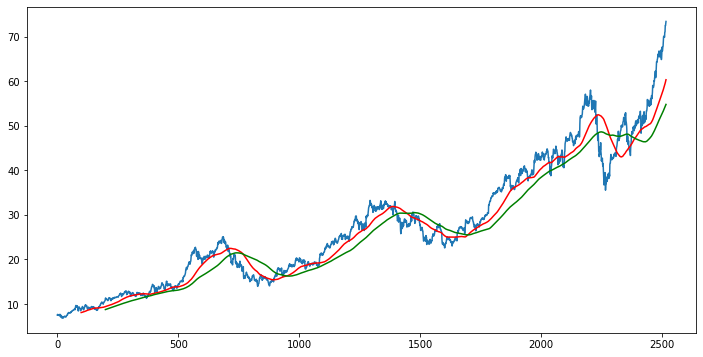

In [23]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [24]:
df.shape

(2517, 5)

In [32]:
#splitting into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [33]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [34]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [35]:
!pip install sklearn


  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 25.9 MB 181 kB/s             
     |████████████████████████████████| 39.3 MB 5.1 MB/s            
     |████████████████████████████████| 306 kB 3.6 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=ba122a3f5b4b2a5fc7ce39b999221180d162cc5cddd30aa50bd22d054cd3152a
  Stored in directory: /home/abdullah/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [38]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(1761, 1)

In [49]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [54]:
!pip install keras

ModuleNotFoundError: No module named 'tensorflow'

In [63]:
# !pip install --ignore-installed --upgrade tensorflow 

!pip install keras.models


     |████████████████████████████████| 49 kB 5.6 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 6.2 MB 7.5 MB/s            
     |████████████████████████████████| 60.3 MB 69 kB/s             
     |████████████████████████████████| 42 kB 2.1 MB/s             
     |████████████████████████████████| 181 kB 7.1 MB/s            
     |████████████████████████████████| 454 kB 8.6 MB/s            
     |████████████████████████████████| 636 kB 13.2 MB/s            
     |████████████████████████████████| 76 kB 2.6 MB/s             
     |████████████████████████████████| 13.7 MB 10.7 MB/s            
     |████████████████████████████████| 9.9 MB 959 kB/s            
     |████████████████████████████████| 130 kB 10.1 MB/s            
     |████████████████████████████████| 58 kB 2.0 MB/s            
     |████████████████████████████████| 97 kB 7.0 MB/s             
  Created wheel for pathlib: filename=pathlib-1.0.1-py3-none-any.whl si

In [64]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [65]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
                input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))



2021-12-26 01:19:15.645569: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-26 01:19:15.645639: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-26 01:19:15.645673: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (abdullah): /proc/driver/nvidia/version does not exist
2021-12-26 01:19:15.646146: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [67]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50
52/52 [==============================] - 22s 306ms/step - loss: 0.0707
Epoch 2/50
52/52 [==============================] - 16s 298ms/step - loss: 0.0129
Epoch 3/50
52/52 [==============================] - 16s 310ms/step - loss: 0.0121
Epoch 4/50
52/52 [==============================] - 19s 360ms/step - loss: 0.0099
Epoch 5/50
52/52 [==============================] - 16s 306ms/step - loss: 0.0102
Epoch 6/50
52/52 [==============================] - 15s 286ms/step - loss: 0.0097
Epoch 7/50
52/52 [==============================] - 16s 298ms/step - loss: 0.0078
Epoch 8/50
52/52 [==============================] - 16s 312ms/step - loss: 0.0089
Epoch 9/50
52/52 [==============================] - 16s 302ms/step - loss: 0.0077
Epoch 10/50
52/52 [==============================] - 16s 314ms/step - loss: 0.0077
Epoch 11/50
52/52 [==============================] - 16s 307ms/step - loss: 0.0066
Epoch 12/50
52/52 [==============================] - 16s 305ms/step - loss: 0.0067
Epoch 13/50
5

In [73]:
model.save('keras_model.h5')

In [68]:
data_testing.head()


,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [69]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing, ignore_index=True)

final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [70]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [71]:
input_data.shape

(856, 1)

In [74]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)    
print(x_test.shape)
print(y_test.shape)


(756, 100, 1)
(756,)


In [75]:
# Making Predictions

y_predicted = model.predict(x_test)

y_predicted.shape

(756, 1)

In [76]:
y_test


array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [77]:
y_predicted

array([[0.11176448],
       [0.11222631],
       [0.11265996],
       [0.1130428 ],
       [0.11336385],
       [0.11361499],
       [0.11379991],
       [0.11394036],
       [0.11406827],
       [0.1142076 ],
       [0.11438116],
       [0.11459467],
       [0.11484393],
       [0.11513263],
       [0.11545885],
       [0.11581227],
       [0.11617921],
       [0.11655483],
       [0.11693126],
       [0.11732352],
       [0.11774132],
       [0.1181878 ],
       [0.11865599],
       [0.1191431 ],
       [0.11973062],
       [0.12047631],
       [0.12142278],
       [0.12260368],
       [0.12404235],
       [0.12574422],
       [0.12769479],
       [0.12980658],
       [0.13204408],
       [0.13442397],
       [0.13694854],
       [0.13960415],
       [0.14237404],
       [0.14524363],
       [0.14818886],
       [0.1511746 ],
       [0.15416482],
       [0.15712604],
       [0.1600557 ],
       [0.16296461],
       [0.16586316],
       [0.1687544 ],
       [0.17163128],
       [0.174

In [72]:
scaler.scale_

array([0.02099517])

In [78]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


<function matplotlib.pyplot.show(close=None, block=None)>

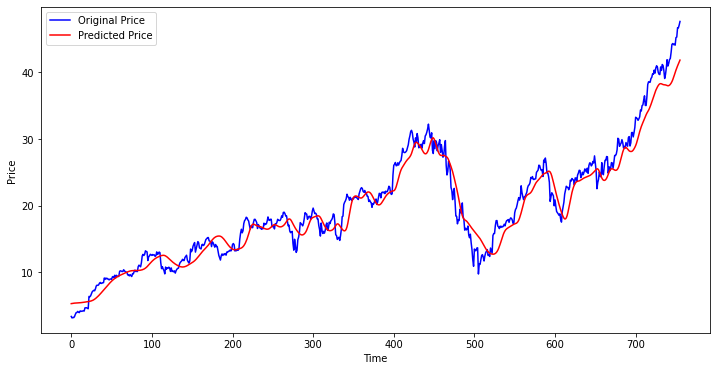

In [79]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show